In [1]:
import pandas as pd 
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy.stats import chi2_contingency

In [4]:
df = pd.read_excel('/Volumes/lab-windingm/home/users/cochral/plug_camera/staging/virgins?/virgincollection.xlsx', 'virgin')

In [5]:


# To apply a function to each row and create a new column based on row data
df['Condition'] = df.apply(lambda row: 'Pregnant' if row['Number of pregnant flies'] > 0 else 'Virgin', axis=1)
                           


In [6]:


# create contingency table
contingency_table = pd.crosstab(df['Condition'], df['Pupae?'])

contingency_table

Pupae?,N,Y
Condition,,
Pregnant,0,144
Virgin,606,11


In [7]:
chi2, pval, dof, expected = chi2_contingency(contingency_table)

pval

1.0228236867842552e-151

In [8]:
# need it in long format for seaborn 

contingency_table.reset_index().melt(id_vars='Condition')

,Condition,Pupae?,value
0,Pregnant,N,0
1,Virgin,N,606
2,Pregnant,Y,144
3,Virgin,Y,11


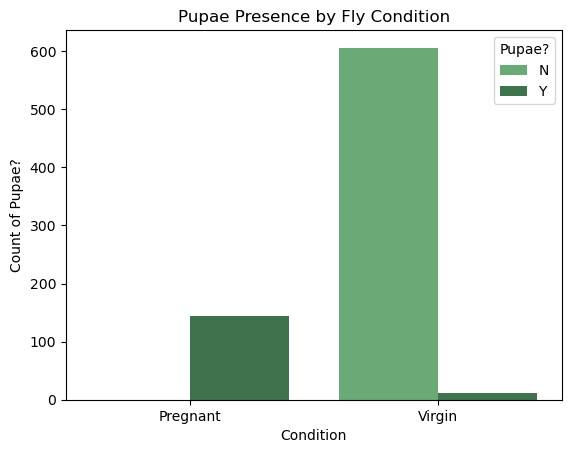

In [9]:
# converting the contingency table into 'long' format using melt, which is necessary for seaborn's barplot function

sns.barplot(data=contingency_table.reset_index().melt(id_vars='Condition'), x='Condition', y='value', hue='Pupae?', palette='Greens_d')
plt.title('Pupae Presence by Fly Condition')
plt.xlabel('Condition')
plt.ylabel('Count of Pupae?')
plt.show()

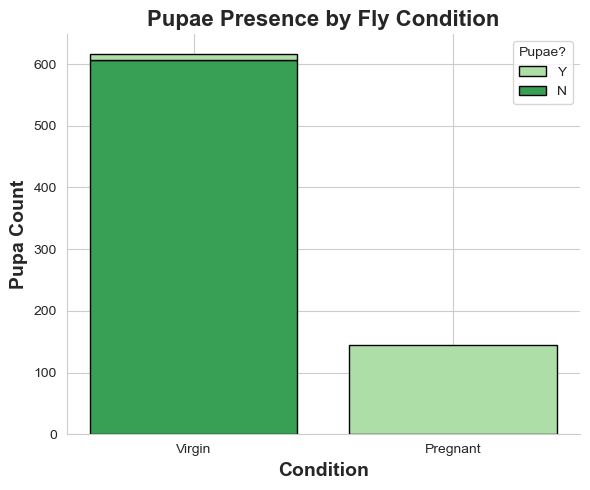

In [10]:
# In this script, we're using sns.histplot which is a high-level seaborn function for histogram plots 
# and can stack bars if given categorical data. 
# The parameter multiple='stack' tells seaborn to stack the bars rather than showing them side by side


plt.figure(figsize=(6, 5))
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create the stacked bar chart

sns.histplot(data=df, x='Condition', hue='Pupae?', multiple='stack', shrink=.8, edgecolor='black', palette='Greens', alpha=1)

# Add the title and labels
plt.title('Pupae Presence by Fly Condition', fontsize=16, fontweight='bold')
plt.xlabel('Condition', fontsize=14, fontweight='bold')
plt.ylabel('Pupa Count', fontsize=14, fontweight='bold')

# Remove the top and right spines for a cleaner look
sns.despine()

# Show the plot
plt.tight_layout()

plt.savefig('/Users/cochral/repos/behavioural-analysis/plots/plug-camera/staging/Pupa_virgin_pregnant.png', dpi=300, bbox_inches='tight')
plt.show()


# TOTAL SUM VIRGIN / DIVIDE THESE BY THAY BETWEEN 0 AND 1 
# CALL IT NON VIRGIN 


In [ ]:
mean_pupa_virgin = df[df['Condition'] == 'Virgin']['Number of Pupae'].mean()

mean_pupa_virgin
# CHECK .MEAN IFNORE NAN VALUES - CHECK 

34.90909090909091

In [ ]:
mean_pupa_preg = df[df['Condition'] == 'Pregnant']['Number of Pupae'].mean()
mean_pupa_preg

52.888888888888886

In [ ]:

from scipy.stats import ttest_ind

# Load your DataFrame
# df = pd.read_csv('your_file.csv')  # Replace with your actual data loading method

# Drop NaN values in 'Number of Pupae' column for accurate comparison
virgin_pupae = df[df['Condition'] == 'Virgin']['Number of Pupae'].dropna()
pregnant_pupae = df[df['Condition'] == 'Pregnant']['Number of Pupae'].dropna()

# Perform the two-sample t-test
t_stat, p_value = ttest_ind(virgin_pupae, pregnant_pupae)

p_value


0.03156135684110732